In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
url = "https://raw.githubusercontent.com/utkarshjadhav96/ML-Lab/main/employee_data.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Employee_ID,Name,Age,Salary,Department,Experience (Years),City,Gender,Performance Score
0,101,Employee_1,50,110592,HR,9,Denver,Female,84
1,102,Employee_2,36,48110,IT,29,San Diego,Male,92
2,103,Employee_3,29,119309,IT,26,Chicago,Female,97
3,104,Employee_4,42,67266,Marketing,25,Seattle,Male,65
4,105,Employee_5,40,92992,Finance,24,Boston,Male,91


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         100 non-null    int64 
 1   Name                100 non-null    object
 2   Age                 100 non-null    int64 
 3   Salary              100 non-null    int64 
 4   Department          100 non-null    object
 5   Experience (Years)  100 non-null    int64 
 6   City                100 non-null    object
 7   Gender              100 non-null    object
 8   Performance Score   100 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [6]:
df = df.drop(['Employee_ID', 'Name'], axis=1)


In [7]:
df['Target'] = df['Performance Score'].apply(lambda x: 1 if x >= 75 else 0)


In [8]:
df.head()

,Age,Salary,Department,Experience (Years),City,Gender,Performance Score,Target
0,50,110592,HR,9,Denver,Female,84,1
1,36,48110,IT,29,San Diego,Male,92,1
2,29,119309,IT,26,Chicago,Female,97,1
3,42,67266,Marketing,25,Seattle,Male,65,0
4,40,92992,Finance,24,Boston,Male,91,1


In [9]:
df = df.drop('Performance Score', axis=1)


In [13]:
df.head()

,Age,Salary,Department,Experience (Years),City,Gender,Target
0,50,110592,1,9,2,0,1
1,36,48110,2,29,6,1,1
2,29,119309,2,26,1,0,1
3,42,67266,3,25,7,1,0
4,40,92992,0,24,0,1,1


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['Department', 'City', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [12]:
X = df.drop('Target', axis=1)
y = df['Target']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [18]:
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)


In [21]:
y_pred_prob = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [22]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

In [23]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
y_test

,Target
83,1
53,0
70,1
45,1
44,1
39,1
22,0
80,0
10,1
0,1


In [25]:

from sklearn.metrics import classification_report, accuracy_score



print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.75      0.80      0.77        15

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.62      0.65      0.64        20



In [34]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    verbose=0
)


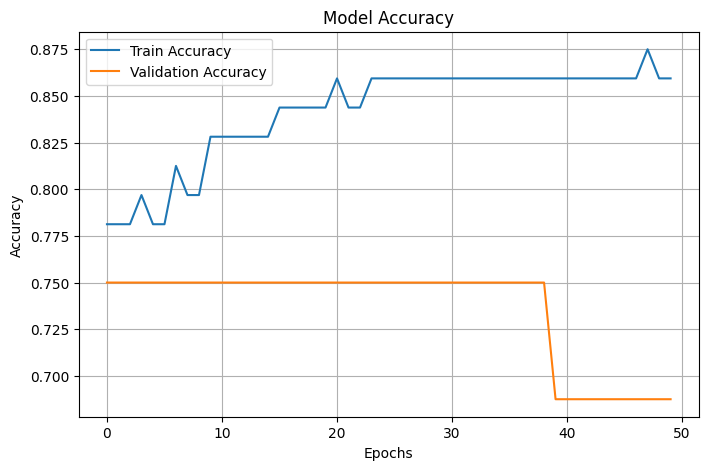

In [35]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
